Modeling Gene Networks: Examples
===

Prof. Eric Klavins

&copy; 2019, University of Washington

In [3]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import math
from sympy import *
%matplotlib inline

# Bistable Switch

The bistable switch in Gardner, Cantor, and Collins 2000 has the model

$$
\dot u = \frac{\alpha_1}{1 + v^\beta} - u \\
\dot v = \frac{\alpha_2}{1 + u^\gamma} - v 
$$

where $\alpha_1$ and $\alpha_2$ are the expression rates of the two genes $u$ and $v$, and $\beta$ and $\gamma$ are the Hill coefficients. When these coefficients are not integers, it is hard to find the equilibria. What they do instead in the paper is plot the *nullclines* is phase space. 

A *nullcline* is a solution to one of the two differential equations at its equilibrium. So the $u$-nullcline is 

$$
u = \frac{\alpha_1}{1 + v^\beta}
$$

That is a curve where $u$ is a function of $v$. Along this curve, $\dot u = 0$, so all the vectors point straight up or down (or are zero).

Similarly, the $v$-nullcline is

$$
v = \frac{\alpha_2}{1 + u^\gamma}
$$

Where nullclines cross, you get an equilibrium, since both rates of change are zero. The nullclines cross at three points. The outer two are stable, and the middle one is unstable. If you get the two production rates imbalanced, or if the Hill coefficients are not high enough, you lose this picture, and the system is no longer bistable.

In [18]:
var("a1 a2 b g u v")
dotu = a1 / ( 1 + v**b ) - u
dotv = a2 / ( 1 + u**g ) - v

In [26]:
unc = solve(dotu,u)[0]
unc

a1/(v**b + 1)

In [27]:
vnc = solve(dotv,v)[0]
vnc

a2/(u**g + 1)

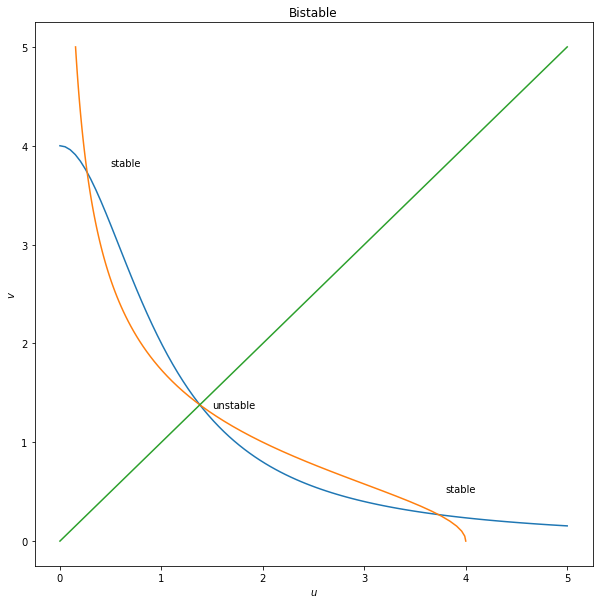

In [138]:
params = [ (a1,4), (a2,4), (b,2), (g,2) ]
uvals = np.linspace(0,5,100)
vvals = uvals
fu = lambdify(v,unc.subs(params),'numpy')
fv = lambdify(u,vnc.subs(params),'numpy')

plt.rcParams['figure.figsize'] = [10,10]
plt.plot(uvals,fv(uvals))
plt.plot(fu(vvals),vvals)
plt.plot(uvals,uvals);
plt.xlabel("$u$")
plt.ylabel("$v$")
plt.text(0.5,3.8,"stable",horizontalalignment='left')
plt.text(3.8,0.5,"stable",horizontalalignment='left')
plt.text(1.5,1.35,"unstable",horizontalalignment='left')
plt.title("Bistable")


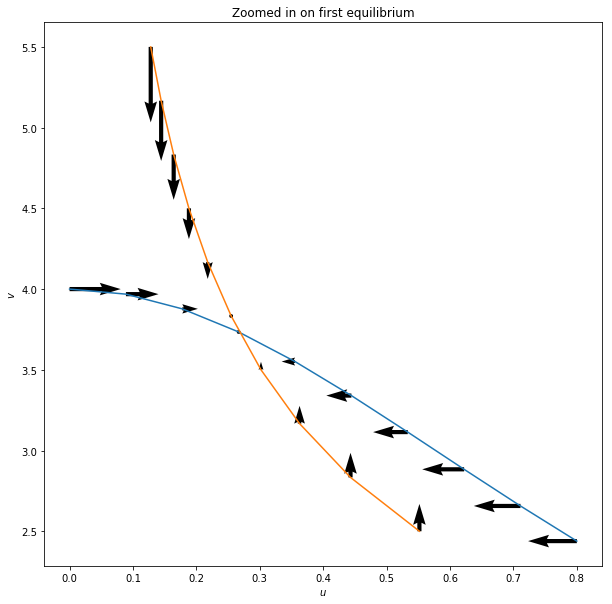

In [133]:
params = [ (a1,4), (a2,4), (b,2), (g,2) ]
uvals = np.linspace(0,0.8,10)
vvals = np.linspace(2.5,5.5,10)
fu = lambdify(v,unc.subs(params),'numpy')
fv = lambdify(u,vnc.subs(params),'numpy')

fdotu = lambdify([u,v],dotu.subs(params),'numpy')
fdotv = lambdify([u,v],dotv.subs(params),'numpy')

plt.quiver(uvals,fu(uvals),fdotu(uvals, fu(uvals)), fdotv(uvals, fu(uvals)))
plt.quiver(fu(vvals),vvals,fdotu(fu(vvals),vvals), fdotv(fu(vvals),vvals))

plt.rcParams['figure.figsize'] = [10,10]
plt.plot(uvals,fv(uvals))
plt.plot(fu(vvals),vvals)
plt.xlabel("$u$")
plt.ylabel("$v$")
plt.title("Zoomed in on first equilibrium");

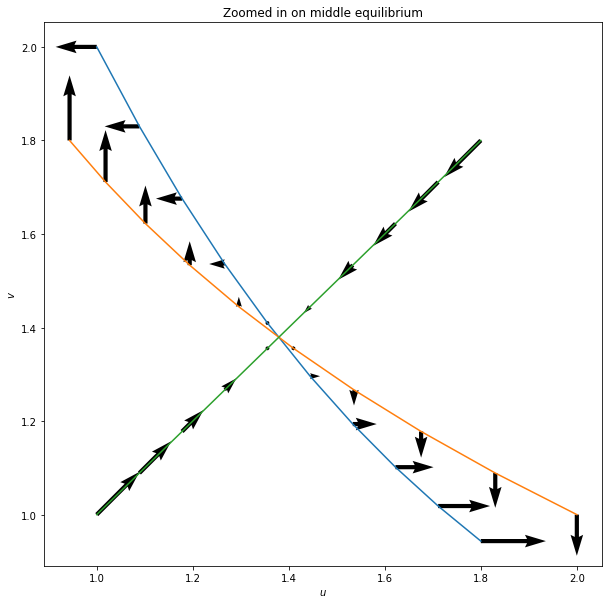

In [140]:
params = [ (a1,4), (a2,4), (b,2), (g,2) ]
uvals = np.linspace(1,1.8,10)
vvals = np.linspace(1,1.8,10)
fu = lambdify(v,unc.subs(params),'numpy')
fv = lambdify(u,vnc.subs(params),'numpy')

fdotu = lambdify([u,v],dotu.subs(params),'numpy')
fdotv = lambdify([u,v],dotv.subs(params),'numpy')

plt.quiver(uvals,fu(uvals),fdotu(uvals, fu(uvals)), fdotv(uvals, fu(uvals)))
plt.quiver(fu(vvals),vvals,fdotu(fu(vvals),vvals), fdotv(fu(vvals),vvals))
plt.quiver(uvals, uvals,fdotu(uvals, uvals), fdotv(uvals, uvals))

plt.rcParams['figure.figsize'] = [10,10]
plt.plot(uvals,fv(uvals))
plt.plot(fu(vvals),vvals)
plt.plot(uvals,uvals);
plt.xlabel("$u$")
plt.ylabel("$v$")
plt.title("Zoomed in on middle equilibrium");

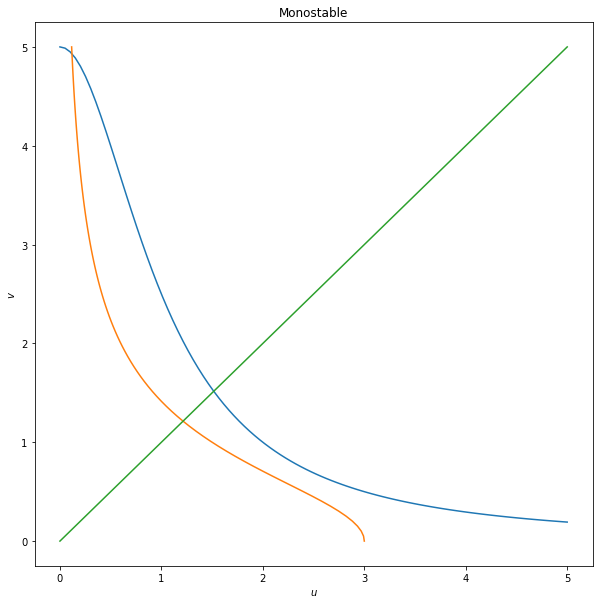

In [121]:
params = [ (a1,3), (a2,5), (b,2), (g,2) ]
uvals = np.linspace(0,5,100)
vvals = uvals
fu = lambdify(v,unc.subs(params),'numpy')
fv = lambdify(u,vnc.subs(params),'numpy')

plt.rcParams['figure.figsize'] = [10,10]
plt.plot(uvals,fv(uvals))
plt.plot(fu(vvals),vvals)
plt.xlabel("$u$")
plt.ylabel("$v$")
plt.title("Monostable")
plt.plot(uvals,uvals);

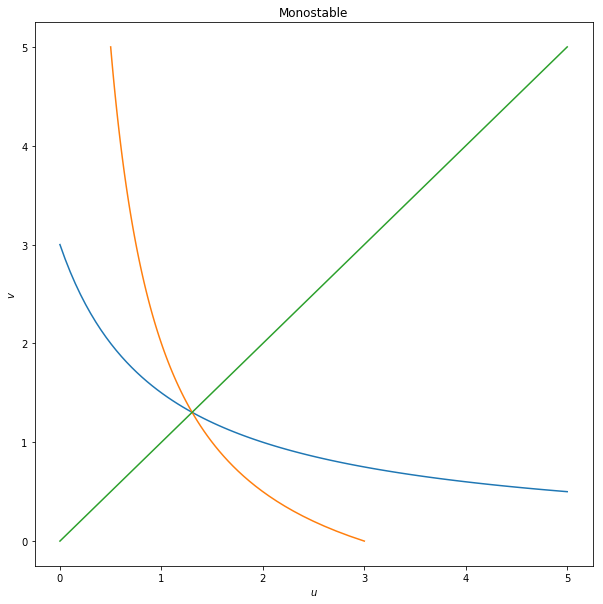

In [64]:
params = [ (a1,3), (a2,3), (b,1), (g,1) ]
uvals = np.linspace(0,5,100)
vvals = uvals
fu = lambdify(v,unc.subs(params),'numpy')
fv = lambdify(u,vnc.subs(params),'numpy')

plt.rcParams['figure.figsize'] = [10,10]
plt.plot(uvals,fv(uvals))
plt.plot(fu(vvals),vvals)
plt.xlabel("$u$")
plt.ylabel("$v$")
plt.title("Monostable")
plt.plot(uvals,uvals);

# The Repressilator

The repressilator model has the equations

$$
\dot m_i = -m_i + \frac{\alpha}{1+p_j^n} + \alpha_0 \\
\dot p_i = -\beta(p_i-m_i)
$$

[2.38925762 2.29951994 1.73542827 2.44054904 2.04786517 2.00031897]


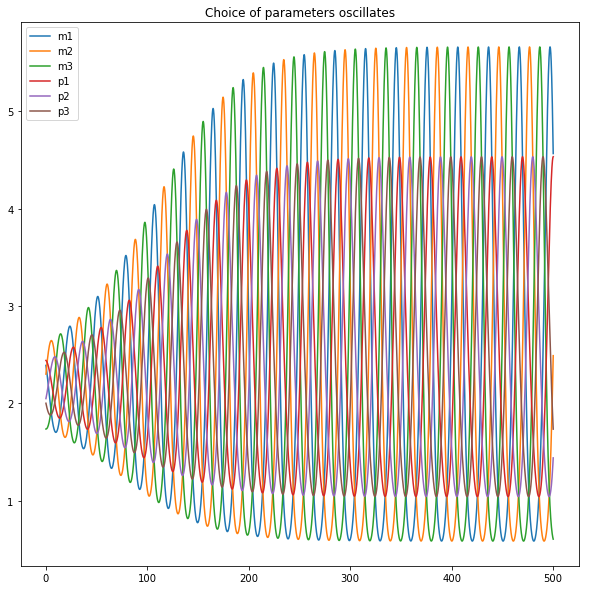

In [197]:
def f(x,t):
    alpha = 12
    alpha0 = 0.01
    beta = 0.2
    n = 2
    m1,m2,m3,p1,p2,p3 = x
    return [
        -m1 + alpha/(1+p2**n) + alpha0,
        -m2 + alpha/(1+p3**n) + alpha0,
        -m3 + alpha/(1+p1**n) + alpha0,
        -beta*(p1-m1),
        -beta*(p2-m2),
        -beta*(p3-m3),        
    ]

t = np.linspace(0,10,40)
x0 = 0.1*np.array([1,2,3,4,5,6])
x = spi.odeint(f,x0,t)

print(x[-1])
t = np.linspace(0,500,4000)
x0 = x[-1]
x = spi.odeint(f,x0,t)

plots=plt.plot(t,x);
plt.legend(plots,["m1","m2","m3","p1","p2","p3"]);
plt.title("Choice of parameters oscillates");

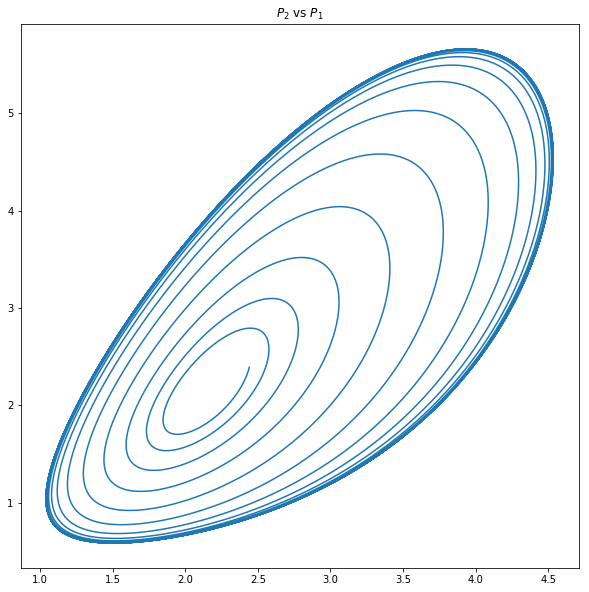

In [193]:
plt.plot(x[:,3],x[:,0]);
plt.title("$P_2$ vs $P_1$");

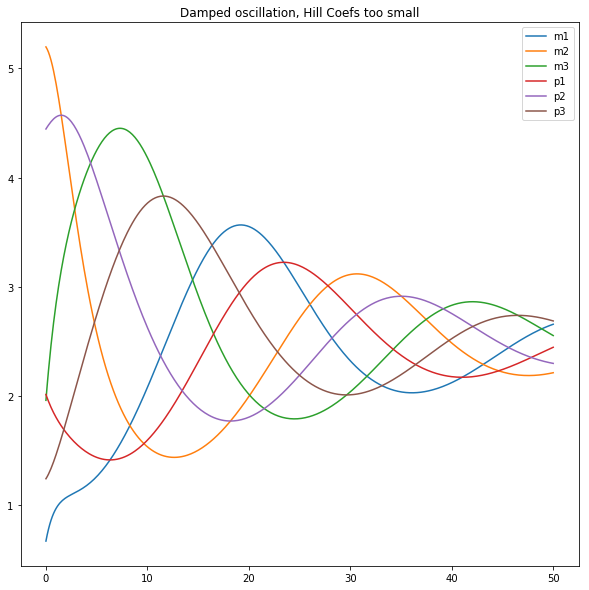

In [194]:
def f(x,t):
    alpha = 12
    alpha0 = 0.01
    beta = 0.2
    n = 1.5
    m1,m2,m3,p1,p2,p3 = x
    return [
        -m1 + alpha/(1+p2**n) + alpha0,
        -m2 + alpha/(1+p3**n) + alpha0,
        -m3 + alpha/(1+p1**n) + alpha0,
        -beta*(p1-m1),
        -beta*(p2-m2),
        -beta*(p3-m3),        
    ]

t = np.linspace(0,50,400)
x0 = [0.66895567, 5.19642385, 1.95855303, 2.01242833, 4.44446153, 1.24026838]
x = spi.odeint(f,x0,t)
plots=plt.plot(t,x);
plt.legend(plots,["m1","m2","m3","p1","p2","p3"]);
plt.title("Damped oscillation, Hill Coefs too small");